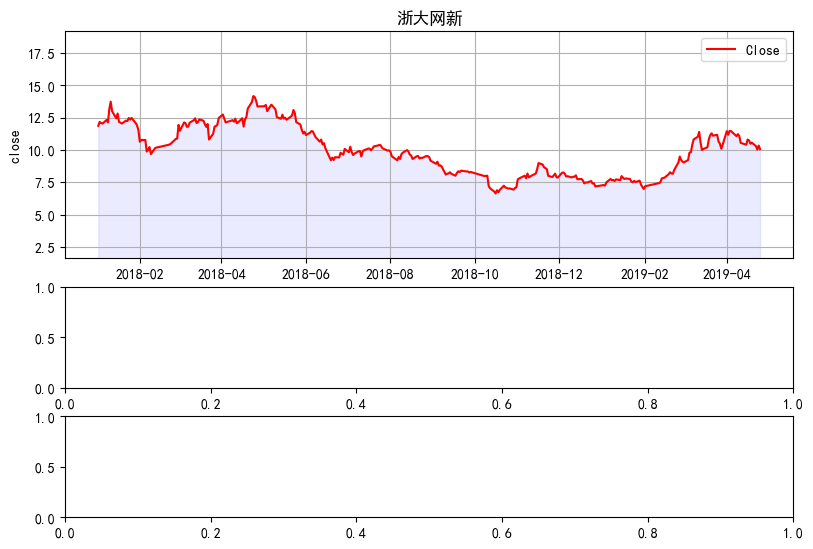

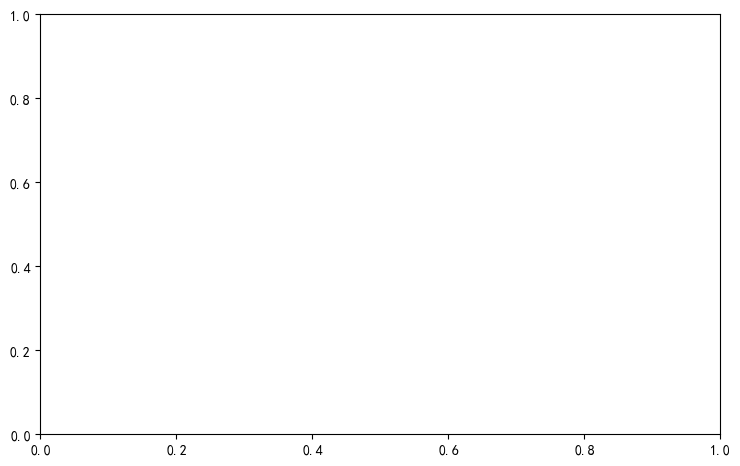

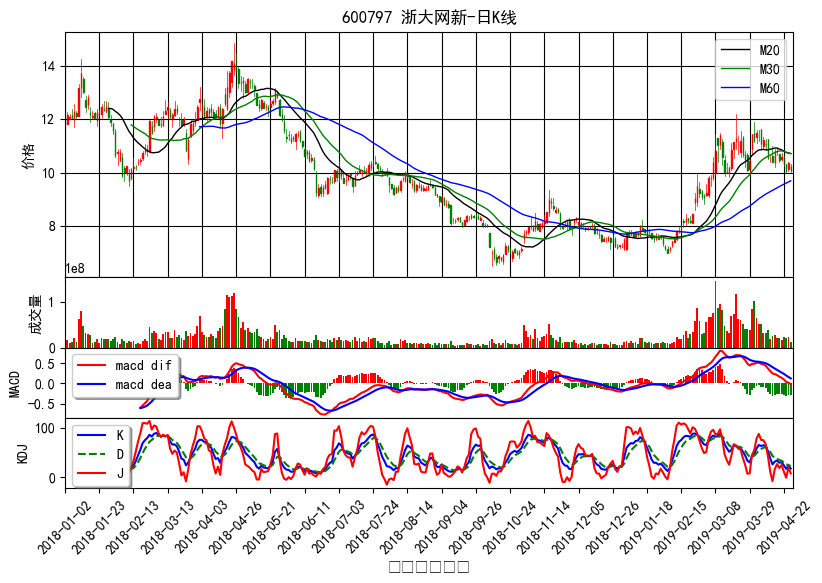

In [16]:
#! /usr/bin/env python 
#-*- encoding: utf-8 -*- 
#author pythontab.com
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec#分割子图
import mpl_finance as mpf #替换 import matplotlib.finance as mpf
import pandas as pd
import pandas_datareader.data as web
import datetime
import talib
import tushare as ts

reload(sys)
sys.setdefaultencoding('utf-8')

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

df_stockload = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018,1,1), datetime.date.today())
#print(type(datetime.datetime.now().strftime('%Y-%m-%d')))
#df_stockload = ts.get_hist_data('600797',start='2018-01-01',end=datetime.datetime.now().strftime('%Y-%m-%d'))
#df_stockload = df_stockload.sort_index(ascending=False)#降序排序
#df_stockload = df_stockload.sort_index()#升序排序

#python3.7打印
print (df_stockload.head())#查看前几行 
print (df_stockload.columns)#查看列名
print (df_stockload.index)#查看索引
print (df_stockload.describe())#查看各列数据描述性统计

fig = plt.figure(figsize=(8,6), dpi=100,facecolor="white")#创建fig对象
#fig.subplots_adjust(left=0.09,bottom=0.20, right=0.94,top=0.90, wspace=0.2, hspace=0)
#graph_KAV = fig.add_subplot(1,1,1)#创建子图

gs = gridspec.GridSpec(4, 1, left=0.05, bottom=0.2, right=0.96, top=0.96, wspace=None, hspace=0, height_ratios=[3.5,1,1,1])
graph_KAV = fig.add_subplot(gs[0,:])
graph_VOL = fig.add_subplot(gs[1,:])
graph_MACD = fig.add_subplot(gs[2,:])
graph_KDJ = fig.add_subplot(gs[3,:])


""" 绘制K线图 """
#方法1
ohlc = []
ohlc = list(zip(np.arange(0,len(df_stockload.index)),df_stockload.Open,df_stockload.Close,df_stockload.High,df_stockload.Low))#使用zip方法生成数据列表 
mpf.candlestick_ochl(graph_KAV, ohlc, width=0.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势
#方法2
#mpf.candlestick2_ochl(graph_KAV, df_stockload.Open,df_stockload.Close,df_stockload.High,df_stockload.Low, width=0.5, colorup='r', colordown='g')#绘制K线走势
""" 绘制K线图 """

""" 绘制移动平均线图 """

df_stockload['Ma20'] = df_stockload.Close.rolling(window=20).mean()#pd.rolling_mean(df_stockload.Close,window=20)
df_stockload['Ma30'] = df_stockload.Close.rolling(window=30).mean()#pd.rolling_mean(df_stockload.Close,window=30)
df_stockload['Ma60'] = df_stockload.Close.rolling(window=60).mean()#pd.rolling_mean(df_stockload.Close,window=60)

numt = np.arange(0, len(df_stockload.index))

#绘制均线走势    
graph_KAV.plot(numt, df_stockload['Ma20'],'black', label='M20',lw=1.0)
graph_KAV.plot(numt, df_stockload['Ma30'],'green',label='M30', lw=1.0)
graph_KAV.plot(numt, df_stockload['Ma60'],'blue',label='M60', lw=1.0)
graph_KAV.legend(loc='best')

""" 绘制移动平均线图 """

#fig.suptitle('600797 浙大网新', fontsize = 14, fontweight='bold')
graph_KAV.set_title(u"600797 浙大网新-日K线")
#graph_KAV.set_xlabel("日期")
graph_KAV.set_ylabel(u"价格")
graph_KAV.set_xlim(0,len(df_stockload.index)) #设置一下x轴的范围
graph_KAV.set_xticks(range(0,len(df_stockload.index),15))#X轴刻度设定 每15天标一个日期
graph_KAV.grid(True,color='k')
#graph_KAV.set_xticklabels([df_stockload.index.strftime('%Y-%m-%d')[index] for index in graph_KAV.get_xticks()])#标签设置为日期


""" 绘制成交量图 """

graph_VOL.bar(numt, df_stockload.Volume,color=['g' if df_stockload.Open[x] > df_stockload.Close[x] else 'r' for x in range(0,len(df_stockload.index))])

graph_VOL.set_ylabel(u"成交量")
#graph_VOL.set_xlabel("日期")
graph_VOL.set_xlim(0,len(df_stockload.index)) #设置一下x轴的范围
graph_VOL.set_xticks(range(0,len(df_stockload.index),15))#X轴刻度设定 每15天标一个日期
#graph_VOL.set_xticklabels([df_stockload.index.strftime('%Y-%m-%d')[index] for index in graph_VOL.get_xticks()])#标签设置为日期

""" 绘制成交量图 """


''' 绘制MACD '''   
         
macd_dif, macd_dea, macd_bar = talib.MACD(df_stockload['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
graph_MACD.plot(np.arange(0, len(df_stockload.index)), macd_dif, 'red', label='macd dif') #dif    
graph_MACD.plot(np.arange(0, len(df_stockload.index)), macd_dea, 'blue', label='macd dea') #dea 
#绘制BAR>0 柱状图
bar_red = np.where(macd_bar>0, 2*macd_bar, 0)
#绘制BAR<0 柱状图
bar_green = np.where(macd_bar<0, 2*macd_bar, 0)        
graph_MACD.bar(np.arange(0, len(df_stockload.index)), bar_red, facecolor='red')
graph_MACD.bar(np.arange(0, len(df_stockload.index)), bar_green, facecolor='green')
graph_MACD.legend(loc='best',shadow=True, fontsize ='10')

graph_MACD.set_ylabel(u"MACD")
#graph_MACD.set_xlabel("日期")
graph_MACD.set_xlim(0,len(df_stockload.index)) #设置一下x轴的范围
graph_MACD.set_xticks(range(0,len(df_stockload.index),15))#X轴刻度设定 每15天标一个日期
#graph_MACD.set_xticklabels([df_stockload.index.strftime('%Y-%m-%d')[index] for index in graph_MACD.get_xticks()])#标签设置为日期

''' 绘制MACD ''' 

''' 绘制KDJ '''

xd = 9-1
date = df_stockload.index.to_series()
RSV = pd.Series(np.zeros(len(date)-xd),index=date.index[xd:])
Kvalue = pd.Series(0.0,index=RSV.index)
Dvalue = pd.Series(0.0,index=RSV.index)
Kvalue[0],Dvalue[0] = 50,50

for day_ind in range(xd, len(df_stockload.index)):
	RSV[date[day_ind]] = (df_stockload.Close[day_ind] - df_stockload.Low[day_ind-xd:day_ind+1].min())/(df_stockload.High[day_ind-xd:day_ind+1].max()-df_stockload.Low[day_ind-xd:day_ind+1].min())*100
	if day_ind > xd:
		index = day_ind-xd
		Kvalue[index] = 2.0/3*Kvalue[index-1]+RSV[date[day_ind]]/3
		Dvalue[index] = 2.0/3*Dvalue[index-1]+Kvalue[index]/3
df_stockload['RSV'] = RSV
df_stockload['K'] = Kvalue
df_stockload['D'] = Dvalue
df_stockload['J'] = 3*Kvalue-2*Dvalue   
 
graph_KDJ.plot(np.arange(0, len(df_stockload.index)), df_stockload['K'], 'blue', label='K') #K    
graph_KDJ.plot(np.arange(0, len(df_stockload.index)), df_stockload['D'], 'g--', label='D') #D
graph_KDJ.plot(np.arange(0, len(df_stockload.index)), df_stockload['J'], 'r-', label='J') #J         
graph_KDJ.legend(loc='best',shadow=True, fontsize ='10')

graph_KDJ.set_ylabel(u"KDJ")
graph_KDJ.set_xlabel("日期")
graph_KDJ.set_xlim(0,len(df_stockload.index)) #设置一下x轴的范围
graph_KDJ.set_xticks(range(0,len(df_stockload.index),15))#X轴刻度设定 每15天标一个日期
graph_KDJ.set_xticklabels([df_stockload.index.strftime('%Y-%m-%d')[index] for index in graph_KDJ.get_xticks()])#标签设置为日期

''' 绘制KDJ '''

#X-轴每个ticker标签都向右倾斜45度 

for label in graph_KAV.xaxis.get_ticklabels():   
	#label.set_rotation(45)
	#label.set_fontsize(10)#设置标签字体
	label.set_visible(False)

for label in graph_VOL.xaxis.get_ticklabels():   
	#label.set_rotation(45)
	#label.set_fontsize(10)#设置标签字体
	label.set_visible(False)

for label in graph_MACD.xaxis.get_ticklabels():   
	#label.set_rotation(45)
	#label.set_fontsize(10)#设置标签字体
	label.set_visible(False)
		
for label in graph_KDJ.xaxis.get_ticklabels():   
	label.set_rotation(45)
	label.set_fontsize(10)#设置标签字体

plt.show()


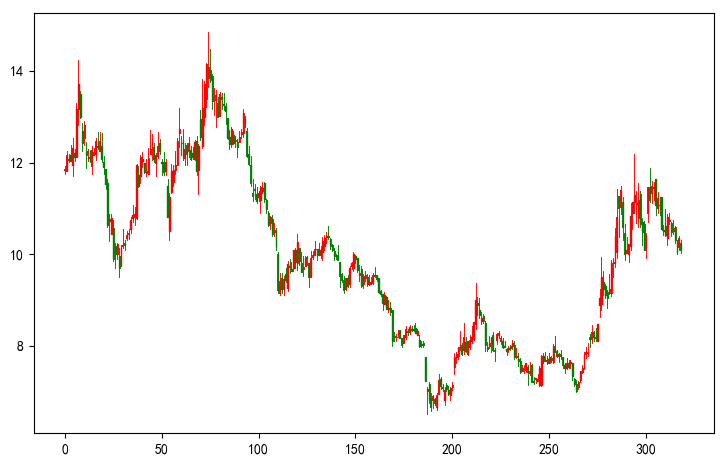

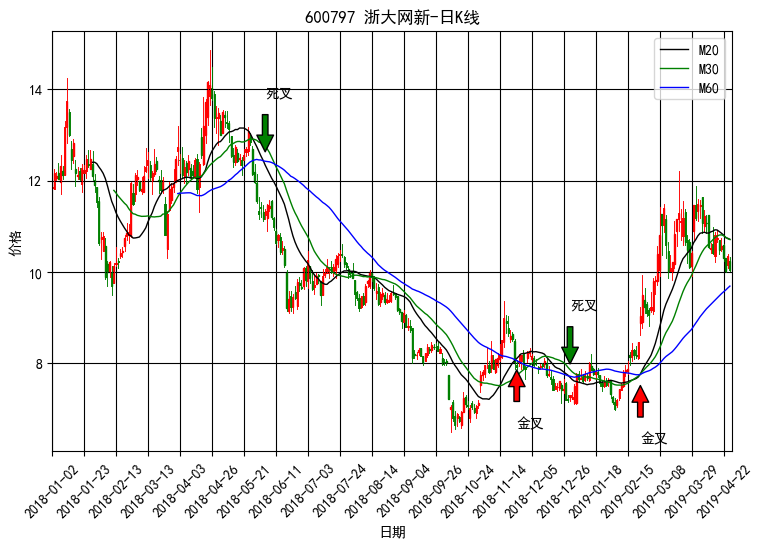

In [18]:
#! /usr/bin/env python 
#-*- encoding: utf-8 -*- 
#author pythontab.com 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec#分割子图
import mpl_finance as mpf #替换 import matplotlib.finance as mpf
#import matplotlib.finance as mpf
import pandas as pd
import pandas_datareader.data as web
import datetime
import talib
#import tushare as ts#cmd /k C:\Python27.15\python.exe "$(FULL_CURRENT_PATH)" & PAUSE & EXIT 更改为2.7.15下运行

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

df_stockload = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018,1,1), datetime.date.today())
#print(type(datetime.datetime.now().strftime('%Y-%m-%d')))
#df_stockload = ts.get_hist_data('600797',start='2018-01-01',end=datetime.datetime.now().strftime('%Y-%m-%d'))
#df_stockload = df_stockload.sort_index(ascending=False)#降序排序
#df_stockload = df_stockload.sort_index()#升序排序

#python3.7打印
print (df_stockload.head())#查看前几行 
print (df_stockload.columns)#查看列名
print (df_stockload.index)#查看索引
print (df_stockload.describe())#查看各列数据描述性统计


fig = plt.figure(figsize=(8,6), dpi=100,facecolor="white")#创建fig对象
fig.subplots_adjust(left=0.09,bottom=0.20, right=0.94,top=0.90, wspace=0.2, hspace=0)
graph_KAV = fig.add_subplot(1,1,1)#创建子图


""" 绘制K线图 """
#方法1
ohlc = []
ohlc = list(zip(np.arange(0,len(df_stockload.index)),df_stockload.Open,df_stockload.Close,df_stockload.High,df_stockload.Low))#使用zip方法生成数据列表 
mpf.candlestick_ochl(graph_KAV, ohlc, width=0.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势 Python3.7.1
#mpf.candlestick(graph_KAV, ohlc, width=0.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势 Python2.7.5
#方法2
mpf.candlestick2_ochl(graph_KAV, df_stockload.Open,df_stockload.Close,df_stockload.High,df_stockload.Low, width=0.5, colorup='r', colordown='g')#绘制K线走势 Python3.7.1

""" 绘制K线图 """

""" 绘制移动平均线图 """

#df_stockload['Ma20'] = pd.rolling_mean(df_stockload.Close,window=20)
df_stockload['Ma20'] = df_stockload.Close.rolling(window=20).mean()
#df_stockload['Ma30'] = pd.rolling_mean(df_stockload.Close,window=30)
df_stockload['Ma30'] = df_stockload.Close.rolling(window=30).mean()
#df_stockload['Ma60'] = pd.rolling_mean(df_stockload.Close,window=60)
df_stockload['Ma60'] = df_stockload.Close.rolling(window=60).mean()

numt = np.arange(0, len(df_stockload.index))

#绘制收盘价走势    
graph_KAV.plot(numt, df_stockload['Ma20'],'black', label='M20',lw=1.0)
graph_KAV.plot(numt, df_stockload['Ma30'],'green',label='M30', lw=1.0)
graph_KAV.plot(numt, df_stockload['Ma60'],'blue',label='M60', lw=1.0)		
graph_KAV.legend(loc='best')
""" 绘制移动平均线图 """

#fig.suptitle('600797 浙大网新', fontsize = 14, fontweight='bold')
graph_KAV.set_title(u"600797 浙大网新-日K线")
graph_KAV.set_xlabel(u"日期")
graph_KAV.set_ylabel(u"价格")
graph_KAV.set_xlim(0,len(df_stockload.index)) #设置一下x轴的范围
graph_KAV.set_xticks(range(0,len(df_stockload.index),15))#X轴刻度设定 每15天标一个日期
graph_KAV.grid(True,color='k')
graph_KAV.set_xticklabels([df_stockload.index.strftime('%Y-%m-%d')[index] for index in graph_KAV.get_xticks()])#标签设置为日期

for label in graph_KAV.xaxis.get_ticklabels():   
	label.set_rotation(45)
	label.set_fontsize(10)#设置标签字体

""" 跳空缺口 基类"""   
"""
# 新版类继承派生实现方式
class JumpGap_Base:
    def __init__(self, stock_dat):
        self.stock_dat = stock_dat

        self.jump_pd = pd.DataFrame()
        self.stock_dat['changeRatio'] = self.stock_dat.Close.pct_change()*100#计算涨/跌幅 (今收-昨收)/昨收*100% 判断向上跳空缺口/向下跳空缺口
        self.stock_dat['preClose'] = self.stock_dat.Close.shift(1) #增加昨收序列

    def CaljumpGap(self):
        jump_threshold = self.stock_dat.Close.median()*0.01 #跳空阈值 收盘价中位数*0.01
        
        for kl_index in np.arange(0, self.stock_dat.shape[0]):
            today = self.stock_dat.ix[kl_index]#若版本提示已经弃用 可使用loc或iloc替换  
            
            if (today.changeRatio > 0) and ((today.Low-today.preClose) > jump_threshold):
            #向上跳空 (今最低-昨收)/阈值
                today['jump_power'] = (today.Low-today.preClose)/jump_threshold
                #self.DrawjumpGap('up',kl_index,today)
                self.jump_pd = self.jump_pd.append(today)      
            elif (today.changeRatio < 0) and ((today.preClose-today.High) > jump_threshold):
            #向下跳空 (昨收-今最高)/阈值
                today['jump_power'] = (today.High-today.preClose)/jump_threshold
                #self.DrawjumpGap('down',kl_index,today) 
                self.jump_pd = self.jump_pd.append(today)   
                
        print(self.jump_pd.filter(['jump_power','preClose','changeRatio','Close','Volume']))#按顺序只显示该列            
    
        return self.jump_pd

class draw_annotate:    
    def __init__(self, draw_obj):    
        self.am = draw_obj
    def draw_jumpgap(self,stockdat,jump_pd): 
        ''' 绘制跳空缺口 '''        
        for kl_index in np.arange(0, jump_pd.shape[0]):
            today = jump_pd.ix[kl_index]#若版本提示已经弃用 可使用loc或iloc替换 
            inday = stockdat.index.get_loc(jump_pd.index[kl_index])
            if today['jump_power']  > 0:  
                self.am.annotate('up',xy=(inday,today.Low*0.95),xytext=(inday, today.Low*0.9),arrowprops=dict(facecolor='red',shrink=0.1),horizontalalignment='left',verticalalignment='top')
            elif today['jump_power']  < 0:  
                self.am.annotate('down',xy=(inday,today.High*1.05),xytext=(inday, today.High*1.1),arrowprops=dict(facecolor='green',shrink=0.1),horizontalalignment='left',verticalalignment='top')
  
class JumpGap_Redef(JumpGap_Base):
    def __init__(self, stock_dat, draw_obj):    
        JumpGap_Base.__init__(self, stock_dat)     
        self.draw_way = draw_obj
    
    def filtjumpGap(self):
        #self.CaljumpGap()
        self.jump_pd = self.jump_pd[(np.abs(self.jump_pd.changeRatio) > 3)&(self.jump_pd.Volume > self.jump_pd.Volume.median())]#abs取绝对值
        
        print(self.jump_pd.filter(['jump_power','preClose','changeRatio','Close','Volume']))#按顺序只显示该列
        return self.jump_pd
        
    def DrawjumpGap(self):  
        self.draw_way.draw_jumpgap(self.stock_dat,self.jump_pd)

    
app_jumpd = JumpGap_Redef(df_stockload,draw_annotate(graph_KAV))
app_jumpd.CaljumpGap()
app_jumpd.filtjumpGap()
app_jumpd.DrawjumpGap() 
"""

""" 检测跳空缺口 """
""" 
# 以前粗暴实现方式
jump_pd = pd.DataFrame()    
df_stockload['changeRatio'] = df_stockload.Close.pct_change()*100#计算涨/跌幅 (今收-昨收)/昨收*100% 判断向上跳空缺口/向下跳空缺口
df_stockload['preClose'] = df_stockload.Close.shift(1) #增加昨收序列
jump_threshold = df_stockload.Close.median()*0.01 #跳空阈值 收盘价中位数*0.01

for kl_index in np.arange(0, df_stockload.shape[0]):
    today = df_stockload.ix[kl_index]#若版本提示已经弃用 可使用loc或iloc替换  
    
    if (today.changeRatio > 0) and ((today.Low-today.preClose) > jump_threshold):
    #向上跳空 (今最低-昨收)/阈值
        today['jump_power'] = (today.Low-today.preClose)/jump_threshold
        jump_pd = jump_pd.append(today)
        graph_KAV.annotate('up',xy=(kl_index,today.Low-0.2),xytext=(kl_index, today.Low-1),arrowprops=dict(facecolor='red',shrink=0.1),horizontalalignment='left',verticalalignment='top')

    elif (today.changeRatio < 0) and ((today.preClose-today.High) > jump_threshold):
    #向下跳空 (昨收-今最高)/阈值
        today['jump_power'] = (today.High-today.preClose)/jump_threshold
        jump_pd = jump_pd.append(today)
        graph_KAV.annotate('down',xy=(kl_index,today.High+0.2),xytext=(kl_index, today.High+1),arrowprops=dict(facecolor='green',shrink=0.1),horizontalalignment='left',verticalalignment='top')

        
jump_pd = jump_pd[(np.abs(jump_pd.changeRatio) > 2)&(jump_pd.Volume > jump_pd.Volume.median())]#abs取绝对值
format = lambda x: '%.2f' % x
jump_pd = jump_pd.applymap(format)#处理后数据为str

print(jump_pd.filter(['jump_power','preClose','changeRatio','Close','Volume']))#按顺序只显示该列
"""
""" 检测跳空缺口 """    



""" 显示均线金叉/死叉提示符 """    

#显示均线金叉/死叉提示符
list_diff = np.sign(df_stockload['Ma20']-df_stockload['Ma60'])
list_signal = np.sign(list_diff-list_diff.shift(1))

#print("list_diff",list_diff)
#list_signal = list_signal[list_signal !=0]
#list_signal = list_signal.dropna(axis=0,how='any')#去除NA值
#print("list_signal",list_signal)

#循环方式实现
for i in range(len(list_signal)):
    if list_signal[i] < 0:
        graph_KAV.annotate(u"死叉", xy=(i, df_stockload['Ma20'][i]), xytext=(i, df_stockload['Ma20'][i]+1.5),
                         arrowprops=dict(facecolor='green', shrink=0.2))
        print(df_stockload.iloc[i])
    if list_signal[i] > 0:
        graph_KAV.annotate(u"金叉", xy=(i, df_stockload['Ma20'][i]), xytext=(i, df_stockload['Ma20'][i]-1.5),
                         arrowprops=dict(facecolor='red', shrink=0.2))
        print(df_stockload.iloc[i])

""" 显示均线金叉/死叉提示符 """    

plt.show()


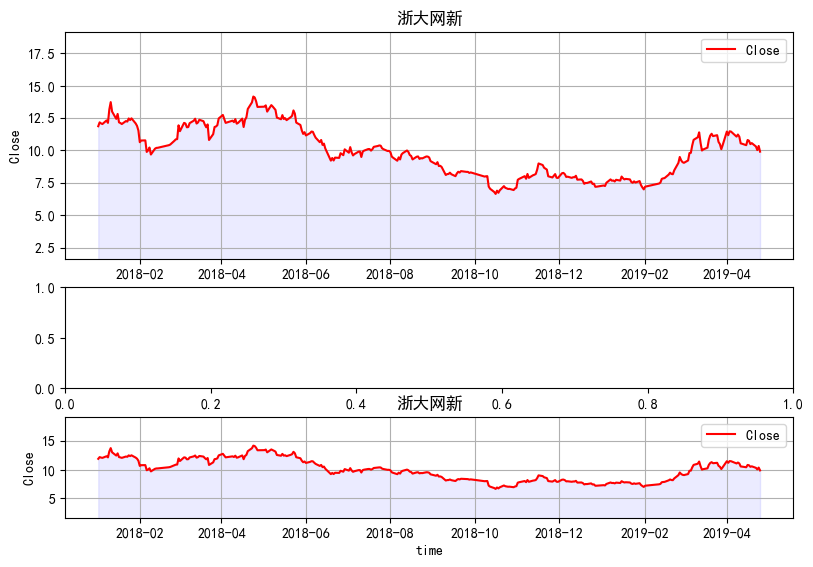

AttributeError: 'DataFrame' object has no attribute 'signal'

In [13]:
#! /usr/bin/env python 
#-*- encoding: utf-8 -*- 
#author pythontab.com 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec#分割子图
import mpl_finance as mpf #替换 import matplotlib.finance as mpf
import pandas as pd
import pandas_datareader.data as web
import datetime
import talib
import csv,os,codecs
import tushare as ts
import os

os.mkdir('.\\out1')

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#规整化 测试 #cmd /k C:\Users\Administrator\AppData\Local\Programs\Python\Python37-32\python.exe "$(FULL_CURRENT_PATH)" & PAUSE & EXIT

stock = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018,1,1), datetime.date.today())
stock.to_csv('.\\out1\\600797SS.csv')

def plot_trade(stock_df):

    if os.path.isfile('C:\\Users\\13126\\Desktop\\量化交易\\out1\\600797SS.csv'):
        f=codecs.open('C:\\Users\\13126\\Desktop\\量化交易\\out1\\600797SS.csv','rb','gb2312')#GB2312编码——>unicode
        #u = f.read()
        #print type(u)#<type 'unicode'>
        reader = csv.DictReader(f)

        for row in reader:
            #print type(row["名称"]),row["名称"].encode('gb2312')#<type 'str'>
            #start = stock_df[stock_df.index == buy_date].key.values[0]#起始时间
            #end = stock_df[stock_df.index == sell_date].key.values[0]#终止时间
            buy_date = row["买入时间"]
            sell_date = row["卖出时间"]
            hands_num =  row["股数"]
            #print len("卖"),len(u"卖"),buy_date,sell_date,hands_num,row #3 / 1
            start = stock_df.index.get_loc(buy_date)#'2017-01-16'
            end = stock_df.index.get_loc(sell_date)#'2017-03-16'

            if stock_df.Close[end] < stock_df.Close[start]:#赔钱显示绿色
                plt.fill_between(stock_df.index[start:end],0,stock_df.Close[start:end],color='green',alpha=0.38)
                is_win = False
            else:#赚钱显示绿色
                plt.fill_between(stock_df.index[start:end],0,stock_df.Close[start:end],color='red',alpha=0.38)
                is_win = True
            plt.annotate('获利\n'+ hands_num+u'手' if is_win else '亏损\n'+hands_num+u'手',xy=(sell_date,stock_df.Close.asof(sell_date)),xytext=(sell_date, stock_df.Close.asof(sell_date)+4),arrowprops=dict(facecolor='yellow',shrink=0.1),horizontalalignment='left',verticalalignment='top')
            #print(buy_date,sell_date)
        f.Close()
    plt.plot(stock_df.index,stock_df.Close,color='r')
    
    """整个时间序列填充为底色blue 透明度alpha小于后标注区间颜色"""    
    plt.fill_between(stock_df.index,0,stock_df.Close,color='blue',alpha=.08)

    plt.xlabel('time')
    plt.ylabel('Close')
    plt.title(u'浙大网新')
    plt.grid(True)
    plt.ylim(np.min(stock_df.Close)-5,np.max(stock_df.Close)+5)#设置Y轴范围
    plt.legend(['Close'],loc='best')
    plt.show()

def plot_trade_profit(stock_df):

    fig = plt.figure(figsize=(8,6), dpi=100,facecolor="white")#创建fig对象
    gs = gridspec.GridSpec(3, 1, left=0.05, bottom=0.15, right=0.96, top=0.96, wspace=None, hspace=0.2, height_ratios=[4.5,2,2])
    graph_trade = fig.add_subplot(gs[0,:])
    graph_total = fig.add_subplot(gs[1,:])
    graph_profit = fig.add_subplot(gs[2,:])    

    if os.path.isfile('C:\\Users\\13126\\Desktop\\量化交易\\out1\\600797SS.csv'):
        f=codecs.open('C:\\Users\\13126\\Desktop\\量化交易\\out1\\600797SS.csv','rb','gb2312')#GB2312编码——>unicode
        reader = csv.DictReader(f)

        for row in reader:
            buy_date = row["买入时间"]
            sell_date = row["卖出时间"]
            hands_num =  row["股数"]
             
            start = stock_df.index.get_loc(buy_date)#'2017-01-16'
            end = stock_df.index.get_loc(sell_date)#'2017-03-16'

            stock_df.loc[buy_date,'signal'] = 1 #买入股票符号
            stock_df.loc[buy_date,'price'] = float(row["买入价格"]) #买入股票价格

            stock_df.loc[sell_date,'signal'] = 0 #卖出股票符号
            stock_df.loc[sell_date,'price'] = float(row["卖出价格"]) #卖出股票价格

            if stock_df.Close[end] < stock_df.Close[start]:#赔钱显示绿色
                graph_trade.fill_between(stock_df.index[start:end],0,stock_df.Close[start:end],color='green',alpha=0.38)
                is_win = False
            else:#赚钱显示绿色
                graph_trade.fill_between(stock_df.index[start:end],0,stock_df.Close[start:end],color='red',alpha=0.38)
                is_win = True
            graph_trade.annotate('获利\n'+ hands_num+u'手' if is_win else '亏损\n'+hands_num+u'手',xy=(sell_date,stock_df.Close.asof(sell_date)),xytext=(sell_date, stock_df.Close.asof(sell_date)+4),arrowprops=dict(facecolor='yellow',shrink=0.1),horizontalalignment='left',verticalalignment='top')
            
        f.Close()
    graph_trade.plot(stock_df.index,stock_df.Close,color='r')

    """整个时间序列填充为底色blue 透明度alpha小于后标注区间颜色"""    
    graph_trade.fill_between(stock_df.index,0,stock_df.Close,color='blue',alpha=.08)

    graph_trade.set_ylabel('Close')
    graph_trade.set_title(u'浙大网新')
    graph_trade.grid(True)
    graph_trade.set_ylim(np.min(stock_df.Close)-5,np.max(stock_df.Close)+5)#设置Y轴范围
    graph_trade.legend(['Close'],loc='best')

    skip_days = 0
    cash_hold = 100000#初始资金
    posit_num = 0#持股数目
    market_total = 0#持股市值 
    profit_curve = [] 

    stock_df['keep'] = stock_df.signal
    stock_df['keep'].fillna(method = 'ffill',inplace = True)

    """ 计算基准收益 """
    stock_df['benchmark_profit'] = np.log(stock_df.Close/stock_df.Close.shift(1))
    print('benchmark_profit',stock_df['benchmark_profit'])
    """ 计算趋势突破策略收益 """
    stock_df['trend_profit'] = stock_df.keep*stock_df.benchmark_profit        
           
    for kl_index,today in stock_df.iterrows():
        if today.signal == 1:# 买入    
            start = stock_df.index.get_loc(kl_index)
            skip_days = -1
            posit_num = int(cash_hold/today.Close)
            cash_hold = 0 
        elif today.signal == 0:# 卖出 
            if skip_days == -1:#避免未买先卖
                end = stock_df.index.get_loc(kl_index)
                skip_days = 0
                cash_hold = int(posit_num*today.Close)
                market_total = 0
        if skip_days == -1:
            market_total = int(posit_num*today.Close)
            profit_curve.append(market_total)
        else:
            profit_curve.append(cash_hold)
     
    stock_df['total'] = profit_curve
    print(stock_df['total'])
    stock_df.total.plot(grid=True,ax = graph_total)#ax选择图形显示的子图
    graph_total.legend(['total'],loc='best')

    stock_df[['benchmark_profit','trend_profit']].cumsum().plot(grid=True,ax = graph_profit)
    graph_profit.set_xlabel('time')
    graph_profit.legend(['benchmark_profit','trend_profit'],loc='best')
    
    for label in graph_trade.xaxis.get_ticklabels():   
        label.set_visible(False)
        
    for label in graph_total.xaxis.get_ticklabels():   
        label.set_visible(False)

    for label in graph_profit.xaxis.get_ticklabels():   
        label.set_rotation(45)
        label.set_fontsize(10)#设置标签字体

    plt.show()        
"""
stock = web.DataReader("AAPL", "yahoo", datetime.datetime(2017,1,1), datetime.date.today())#苹果公司数据获取
"""
# stock = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018,1,1), datetime.date.today())
# stock.to_csv('.\\out\\600797SS.csv')

plot_trade(stock)
plot_trade_profit(stock)